# The CTU-13 Dataset

EL fichero "*CSV*" contiene información sobre las distintas conexiones con una variable objetivo final en la columna "*flow*" que determina el "*background*".

## Objetivo

El objetivo es identificar el tipo de tráfico en base a las variables recogidas y a otras que se puedan generar.

## Índice
<ol>
    <li><a href="#preprocessing">Preprocessing</a></li>
        1.1. <a href="#identify_missing_values">Identify missing values</a><br>
        1.2. <a href="#deal_missing_values">Deal with missing values</a><br>
        1.3. <a href="#data_formatting">Data formatting</a><br>
        1.4. <a href="#data_normalization">Data normalization</a><br>
    <li><a href="#exploratory_data_analysis">Exploratory data analysis</a></li>
        2.1. <a href="#univariate_analysis">Univariate analysis</a><br>
        2.2. <a href="#bivariate_analysis">Bivariate analysis</a><br>
    <li><a href="#classification">Classification</a></li>
        3.1. <a href="#svm">SVM</a><br>
        3.2. <a href="#decision_tree">Decision tree</a><br>
        3.3. <a href="#knn">KNN</a><br>
        3.4. <a href="#naive_bayes">Naïve Bayes</a><br>
    <li><a href="#estimator_evaluation">Estimator evaluation</a></li>
        4.1. <a href="#Accuracy">Accuracy</a><br>
        4.2. <a href="#confusion_matrix">Confusion matrix</a><br>
        4.3. <a href="#precision_and_recall">Precision and recall</a><br>
</ol>

-----

## 1. Preprocessing <a class="anchor" id="preprocessing"></a>

Montar Google Drive de forma local:

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Abrir archivo con el Dataset a estudiar:

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Practica/capture20110816-2.binetflow.2format')
print(df.shape)

(114077, 33)


En el Dataset hay 114.077 instancias. Cada instancia contiene:

* 32 atributos.
* 1 variable de salida (*Label*).

Tipo de los atributos:

In [112]:
df.dtypes

SrcAddr        object
DstAddr        object
Proto          object
Sport          object
Dport          object
State          object
sTos          float64
dTos          float64
SrcWin        float64
DstWin        float64
sHops         float64
dHops         float64
StartTime      object
LastTime       object
sTtl          float64
dTtl          float64
TcpRtt        float64
SynAck        float64
AckDat        float64
SrcPkts         int64
DstPkts         int64
SrcBytes        int64
DstBytes        int64
SAppBytes       int64
DAppBytes       int64
Dur           float64
TotPkts         int64
TotBytes        int64
TotAppByte      int64
Rate          float64
SrcRate       float64
DstRate       float64
Label          object
dtype: object

Ver resumen estadístico de cada atributo de tipo numérico ("*int*" y "*float*"):

In [113]:
df.describe()

sTos           dTos        SrcWin        DstWin  \
count  113407.000000  107046.000000  2.265500e+04  2.166500e+04   
mean        0.038596       0.001140  3.149335e+05  1.314489e+05   
std         2.674616       0.056347  1.856274e+06  6.195565e+06   
min         0.000000       0.000000  0.000000e+00  0.000000e+00   
25%         0.000000       0.000000  1.746200e+04  6.912000e+03   
50%         0.000000       0.000000  6.502400e+04  9.600000e+03   
75%         0.000000       0.000000  6.566000e+04  6.553400e+04   
max       192.000000       3.000000  1.672704e+07  5.262541e+08   

               sHops          dHops           sTtl           dTtl  \
count  113407.000000  107046.000000  113407.000000  107046.000000   
mean        4.931389       4.671823      92.066777      84.372961   
std         6.922347       6.268768      35.494987      35.370062   
min         0.000000       0.000000       1.000000      15.000000   
25%         1.000000       1.000000      63.000000      63.000000   
50%         1.000000       1.000000      63.000000      63.000000   
75%         2.000000       9.000000     126.000000     118.000000   
max       121.000000      75.000000     255.000000     255.000000   

              TcpRtt         SynAck  ...      DstBytes     SAppBytes  \
count  114077.000000  114077.000000  ...  1.140770e+05  1.140770e+05   
mean        0.009403       0.005269  ...  4.429729e+04  7.478460e+03   
std         0.071634       0.044405  ...  2.754902e+06  2.597297e+05   
min         0.000000       0.000000  ...  0.000000e+00  0.000000e+00   
25%         0.000000       0.000000  ...  1.200000e+02  3.400000e+01   
50%         0.000000       0.000000  ...  1.390000e+02  3.900000e+01   
75%         0.000000       0.000000  ...  4.660000e+02  2.240000e+02   
max         9.152626       9.152626  ...  7.537580e+08  3.922799e+07   

          DAppBytes            Dur        TotPkts      TotBytes    TotAppByte  \
count  1.140770e+05  114077.000000  114077.000000  1.140770e+05  1.140770e+05   
mean   4.203639e+04      84.655646      65.456762  5.334575e+04  4.951485e+04   
std    2.633759e+06     254.416485    3037.372786  2.847562e+06  2.647980e+06   
min    0.000000e+00       0.000000       1.000000  6.000000e+01  0.000000e+00   
25%    2.600000e+01       0.000319       2.000000  2.140000e+02  1.280000e+02   
50%    9.100000e+01       0.001729       2.000000  2.660000e+02  1.610000e+02   
75%    2.840000e+02       1.376178       6.000000  6.720000e+02  4.890000e+02   
max    7.208982e+08    1277.465088  829858.000000  7.764001e+08  7.208987e+08   

                Rate        SrcRate        DstRate  
count  114077.000000  114077.000000  114077.000000  
mean     1801.388294      60.706172     359.623598  
std      5822.850256    2681.260099    6264.619499  
min         0.000000       0.000000       0.000000  
25%         2.851188       0.000000       0.000000  
50%       645.161255       0.000000       0.000000  
75%      3048.780518       0.052360       0.012401  
max    333333.312500  333333.312500  333333.312500  

[8 rows x 24 columns]

### 1.1. Identify missing values

Buscar atributos con valores vacíos y su porcentaje de valores vacíos sobre el total:

In [114]:
missing_data = df.isnull()
true_counts = [(column, missing_data[column].values.sum(), missing_data[column].values.sum() / len(df.index)) for column in missing_data.columns]
true_counts.sort(key=lambda x:x[1], reverse = True)
true_counts

[('DstWin', 92412, 0.8100844166659361),
 ('SrcWin', 91422, 0.801406067831377),
 ('dTos', 7031, 0.0616338087432173),
 ('dHops', 7031, 0.0616338087432173),
 ('dTtl', 7031, 0.0616338087432173),
 ('sTos', 670, 0.005873225978944047),
 ('sHops', 670, 0.005873225978944047),
 ('sTtl', 670, 0.005873225978944047),
 ('Sport', 169, 0.0014814555081217073),
 ('Dport', 169, 0.0014814555081217073),
 ('SrcAddr', 0, 0.0),
 ('DstAddr', 0, 0.0),
 ('Proto', 0, 0.0),
 ('State', 0, 0.0),
 ('StartTime', 0, 0.0),
 ('LastTime', 0, 0.0),
 ('TcpRtt', 0, 0.0),
 ('SynAck', 0, 0.0),
 ('AckDat', 0, 0.0),
 ('SrcPkts', 0, 0.0),
 ('DstPkts', 0, 0.0),
 ('SrcBytes', 0, 0.0),
 ('DstBytes', 0, 0.0),
 ('SAppBytes', 0, 0.0),
 ('DAppBytes', 0, 0.0),
 ('Dur', 0, 0.0),
 ('TotPkts', 0, 0.0),
 ('TotBytes', 0, 0.0),
 ('TotAppByte', 0, 0.0),
 ('Rate', 0, 0.0),
 ('SrcRate', 0, 0.0),
 ('DstRate', 0, 0.0),
 ('Label', 0, 0.0)]

Todos los atributos tienen un número de valores vacíos inferior al 7% excepto dos: "*DstWin*" y "*SrcWin*".

### 1.2. Deal with missing values

Eliminar los atributos:

* "*DstWin*" y "*SrcWin*" por tener un porcentaje de valores vacíos superior al 80%.
* "*Sport*" y "*Dport*" por tener valores discretos complicados para clasificar.
* "*SrcAddr*" y "*DstAddr*" por tener valores nominales complicados para clasificar.
* "*StartTime*" y "*LastTime*" por tener valores de fechas y horas complicados para clasificar.



In [115]:
df_dropped_columns = df.drop(columns=['DstWin', 'SrcWin', 'Sport', 'Dport', 'SrcAddr', 'DstAddr', 'StartTime', 'LastTime'])

Imputar valores en las instancias que contengan algún valor vacío:

In [116]:
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(missing_values=np.nan,) 
df_numeric_imputed = df_dropped_columns.copy()

df_numeric_imputed[["dTos", "dHops", "dTtl", "sTos", "sHops", "sTtl"]] = imputer.fit_transform(df_dropped_columns[["dTos", "dHops", "dTtl", "sTos", "sHops", "sTtl"]])
print(df_numeric_imputed.shape)

(114077, 25)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### 1.3. Data formatting

Ver valores de la variable de salida "*Label*":

In [117]:
df_numeric_imputed['Label'].value_counts()

flow=To-Background-UDP-CVUT-DNS-Server                          45799
flow=Background-UDP-Established                                 32659
flow=Background-TCP-Established                                 11821
flow=Background-Established-cmpgw-CVUT                          10468
flow=Background-UDP-Attempt                                      4088
flow=Background                                                  2999
flow=To-Background-CVUT-Proxy                                    1706
flow=Background-Attempt-cmpgw-CVUT                                955
flow=From-Normal-V48-Stribrek                                     807
flow=Background-TCP-Attempt                                       565
flow=From-Normal-V48-Grill                                        520
flow=Background-UDP-NTP-Established-1                             308
flow=From-Normal-V48-Jist                                         292
flow=To-Background-CVUT-WebServer                                 231
flow=From-Background

Convertir tipo de dato de la variable de salida a binario ("*True*" o "*False*"):

In [118]:
df_numeric_imputed['Botnet'] = df_numeric_imputed['Label'].str.contains('Botnet')
df_numeric_imputed.drop(columns=['Label'], inplace = True)
df_numeric_imputed.rename(columns = {'Botnet': 'Label'}, inplace = True)
df_numeric_imputed['Label'].value_counts()

False    114014
True         63
Name: Label, dtype: int64

Ver valores del atributo "*Proto*":

In [119]:
df_numeric_imputed['Proto'].value_counts()

udp          89247
tcp          22889
icmp          1653
igmp           103
rtcp            85
arp             64
rtp             25
ipv6-icmp        7
ipx/spx          2
pim              1
ipv6             1
Name: Proto, dtype: int64

Convertir valores nominales del atributo "Proto" a valores numéricos:

In [120]:
dict_proto = {'udp': 1, 'tcp': 2, 'icmp': 3, 'igmp': 4, 'rtcp': 5, 'arp': 6, 'rtp': 7, 'ipv6-icmp': 8, 'ipx/spx': 9, 'pim': 10, 'ipv6': 11 }
df_numeric_imputed = df_numeric_imputed.replace({'Proto': dict_proto})
df_numeric_imputed['Proto'].value_counts()

1     89247
2     22889
3      1653
4       103
5        85
6        64
7        25
8         7
9         2
10        1
11        1
Name: Proto, dtype: int64

Ver valores del atributo "*State*":

In [121]:
df_numeric_imputed['State'].value_counts()

CON       87007
FIN       14241
RST        5572
INT        4752
REQ         620
URP         553
RED         339
URFIL       236
ACC         188
URH         180
ECR         167
ECO          84
TXD          38
URN          29
CLO          26
URHPRO       21
RSP          11
NNS           6
SRC           4
URF           2
NRS           1
Name: State, dtype: int64

Convertir valores nominales del atributo "State" a valores numéricos:

In [122]:
dict_state = {'CON': 1, 'FIN': 2, 'RST': 3, 'INT': 4, 'REQ': 5, 'URP': 6, 'RED': 7, 'URFIL': 8, 'ACC': 9, 'URH': 10, 'ECR': 11, 'ECO': 12, 'TXD': 13, 'URN': 14, 'CLO': 15, 'URHPRO': 16, 'RSP': 17, 'NNS': 18, 'SRC': 19, 'URF': 20, 'NRS': 21 }
df_numeric_imputed = df_numeric_imputed.replace({'State': dict_state})
df_numeric_imputed['State'].value_counts()

1     87007
2     14241
3      5572
4      4752
5       620
6       553
7       339
8       236
9       188
10      180
11      167
12       84
13       38
14       29
15       26
16       21
17       11
18        6
19        4
20        2
21        1
Name: State, dtype: int64

### 1.4. Data normalization

Ver distribución de los valores de los atributos numéricos:

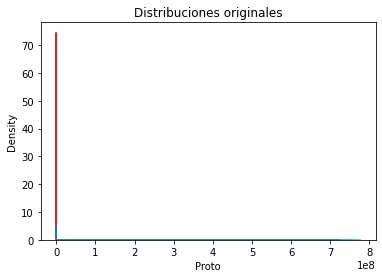

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Distribuciones originales')

sns.kdeplot(df_numeric_imputed['Proto'], ax=ax1)
sns.kdeplot(df_numeric_imputed['State'], ax=ax1)
sns.kdeplot(df_numeric_imputed['sTos'], ax=ax1)
sns.kdeplot(df_numeric_imputed['dTos'], ax=ax1)
sns.kdeplot(df_numeric_imputed['sHops'], ax=ax1)
sns.kdeplot(df_numeric_imputed['dHops'], ax=ax1)
sns.kdeplot(df_numeric_imputed['sTtl'], ax=ax1);
sns.kdeplot(df_numeric_imputed['dTtl'], ax=ax1);
sns.kdeplot(df_numeric_imputed['TcpRtt'], ax=ax1);
sns.kdeplot(df_numeric_imputed['SynAck'], ax=ax1);
sns.kdeplot(df_numeric_imputed['AckDat'], ax=ax1);
sns.kdeplot(df_numeric_imputed['SrcPkts'], ax=ax1);
sns.kdeplot(df_numeric_imputed['DstPkts'], ax=ax1);
sns.kdeplot(df_numeric_imputed['SrcBytes'], ax=ax1);
sns.kdeplot(df_numeric_imputed['DstBytes'], ax=ax1);
sns.kdeplot(df_numeric_imputed['SAppBytes'], ax=ax1);
sns.kdeplot(df_numeric_imputed['DAppBytes'], ax=ax1);
sns.kdeplot(df_numeric_imputed['Dur'], ax=ax1);
sns.kdeplot(df_numeric_imputed['TotPkts'], ax=ax1);
sns.kdeplot(df_numeric_imputed['TotBytes'], ax=ax1);
sns.kdeplot(df_numeric_imputed['TotAppByte'], ax=ax1);
sns.kdeplot(df_numeric_imputed['Rate'], ax=ax1);
sns.kdeplot(df_numeric_imputed['SrcRate'], ax=ax1);
sns.kdeplot(df_numeric_imputed['DstRate'], ax=ax1);


Normalizar los valores de los atributos numéricos con StandardScaler:

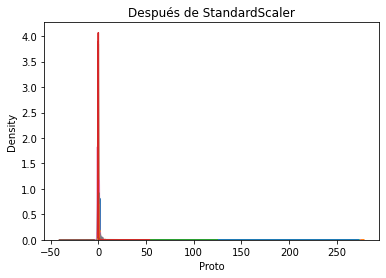

In [124]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_numeric_imputed)

df_s = pd.DataFrame(df_s, columns=df_numeric_imputed.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Después de StandardScaler')

sns.kdeplot(df_s['Proto'], ax=ax1)
sns.kdeplot(df_s['State'], ax=ax1)
sns.kdeplot(df_s['sTos'], ax=ax1)
sns.kdeplot(df_s['dTos'], ax=ax1)
sns.kdeplot(df_s['sHops'], ax=ax1)
sns.kdeplot(df_s['dHops'], ax=ax1)
sns.kdeplot(df_s['sTtl'], ax=ax1);
sns.kdeplot(df_s['dTtl'], ax=ax1);
sns.kdeplot(df_s['TcpRtt'], ax=ax1);
sns.kdeplot(df_s['SynAck'], ax=ax1);
sns.kdeplot(df_s['AckDat'], ax=ax1);
sns.kdeplot(df_s['SrcPkts'], ax=ax1);
sns.kdeplot(df_s['DstPkts'], ax=ax1);
sns.kdeplot(df_s['SrcBytes'], ax=ax1);
sns.kdeplot(df_s['DstBytes'], ax=ax1);
sns.kdeplot(df_s['SAppBytes'], ax=ax1);
sns.kdeplot(df_s['DAppBytes'], ax=ax1);
sns.kdeplot(df_s['Dur'], ax=ax1);
sns.kdeplot(df_s['TotPkts'], ax=ax1);
sns.kdeplot(df_s['TotBytes'], ax=ax1);
sns.kdeplot(df_s['TotAppByte'], ax=ax1);
sns.kdeplot(df_s['Rate'], ax=ax1);
sns.kdeplot(df_s['SrcRate'], ax=ax1);
sns.kdeplot(df_s['DstRate'], ax=ax1);

Normalizar los valores de los atributos numéricos con MinMaxScaler:

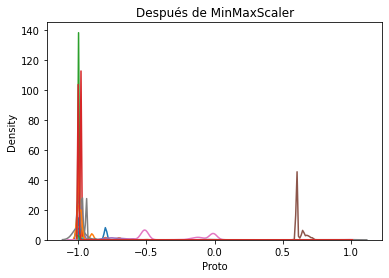

In [45]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

mm_scaler = MinMaxScaler([-1,1])
df_s = mm_scaler.fit_transform(df_numeric_imputed)

df_s = pd.DataFrame(df_s, columns=df_numeric_imputed.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Después de MinMaxScaler')

sns.kdeplot(df_s['Proto'], ax=ax1)
sns.kdeplot(df_s['State'], ax=ax1)
sns.kdeplot(df_s['sTos'], ax=ax1)
sns.kdeplot(df_s['dTos'], ax=ax1)
sns.kdeplot(df_s['sHops'], ax=ax1)
sns.kdeplot(df_s['dHops'], ax=ax1)
sns.kdeplot(df_s['sTtl'], ax=ax1);
sns.kdeplot(df_s['dTtl'], ax=ax1);
sns.kdeplot(df_s['TcpRtt'], ax=ax1);
sns.kdeplot(df_s['SynAck'], ax=ax1);
sns.kdeplot(df_s['AckDat'], ax=ax1);
sns.kdeplot(df_s['SrcPkts'], ax=ax1);
sns.kdeplot(df_s['DstPkts'], ax=ax1);
sns.kdeplot(df_s['SrcBytes'], ax=ax1);
sns.kdeplot(df_s['DstBytes'], ax=ax1);
sns.kdeplot(df_s['SAppBytes'], ax=ax1);
sns.kdeplot(df_s['DAppBytes'], ax=ax1);
sns.kdeplot(df_s['Dur'], ax=ax1);
sns.kdeplot(df_s['TotPkts'], ax=ax1);
sns.kdeplot(df_s['TotBytes'], ax=ax1);
sns.kdeplot(df_s['TotAppByte'], ax=ax1);
sns.kdeplot(df_s['Rate'], ax=ax1);
sns.kdeplot(df_s['SrcRate'], ax=ax1);
sns.kdeplot(df_s['DstRate'], ax=ax1);

Se decide normalizar los valores de los atributos numéricos con **MinMaxScaler** porque es lo recomendado por defecto:

In [126]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

mm_scaler = MinMaxScaler([-1,1])
df_normalized = mm_scaler.fit_transform(df_numeric_imputed)

df_normalized = pd.DataFrame(df_normalized, columns=df_numeric_imputed.columns)

## 2. Exploratory data analysis

Ver información normalizada:

In [127]:
df_normalized.describe()

Proto          State           sTos           dTos  \
count  114077.000000  114077.000000  114077.000000  114077.000000   
mean       -0.951966      -0.950726      -0.996576      -0.979595   
std         0.099720       0.125527       0.027766       0.036033   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000      -1.000000      -0.997065      -0.980350   
50%        -1.000000      -1.000000      -0.997065      -0.980350   
75%        -1.000000      -1.000000      -0.997065      -0.980350   
max         1.000000       1.000000       1.000000       1.000000   

               sHops          dHops           sTtl           dTtl  \
count  114077.000000  114077.000000  114077.000000  114077.000000   
mean       -0.918339       0.621111      -0.282955      -0.961091   
std         0.114102       0.040046       0.278670       0.033390   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -0.983471       0.601497      -0.511811      -0.973325   
50%        -0.983471       0.601497      -0.511811      -0.973325   
75%        -0.950413       0.644578      -0.015748      -0.943316   
max         1.000000       1.000000       1.000000       1.000000   

              TcpRtt         SynAck  ...      SAppBytes      DAppBytes  \
count  114077.000000  114077.000000  ...  114077.000000  114077.000000   
mean       -0.997945      -0.998849  ...      -0.999619      -0.999883   
std         0.015653       0.009703  ...       0.013242       0.007307   
min        -1.000000      -1.000000  ...      -1.000000      -1.000000   
25%        -1.000000      -1.000000  ...      -0.999998      -1.000000   
50%        -1.000000      -1.000000  ...      -0.999998      -1.000000   
75%        -1.000000      -1.000000  ...      -0.999989      -0.999999   
max         1.000000       1.000000  ...       1.000000       1.000000   

                 Dur        TotPkts       TotBytes     TotAppByte  \
count  114077.000000  114077.000000  114077.000000  114077.000000   
mean       -0.867463      -0.999845      -0.999863      -0.999863   
std         0.398315       0.007320       0.007335       0.007346   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        -1.000000      -0.999998      -1.000000      -1.000000   
50%        -0.999997      -0.999998      -0.999999      -1.000000   
75%        -0.997845      -0.999988      -0.999998      -0.999999   
max         1.000000       1.000000       1.000000       1.000000   

                Rate        SrcRate        DstRate          Label  
count  114077.000000  114077.000000  114077.000000  114077.000000  
mean       -0.989192      -0.999636      -0.997842      -0.998895  
std         0.034937       0.016088       0.037588       0.046988  
min        -1.000000      -1.000000      -1.000000      -1.000000  
25%        -0.999983      -1.000000      -1.000000      -1.000000  
50%        -0.996129      -1.000000      -1.000000      -1.000000  
75%        -0.981707      -1.000000      -1.000000      -1.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 25 columns]

### 2.1. Univariate analysis

Ver la distribución los valores de la variable de salida:

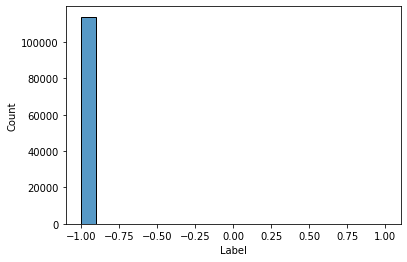

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df_normalized['Label']

sns.histplot(x, bins = 20);

plt.show()

El problema está muy desequilibrado porque hay muy pocos casos positivos en la muestra.

Ver distribución de los valores de los atributos:

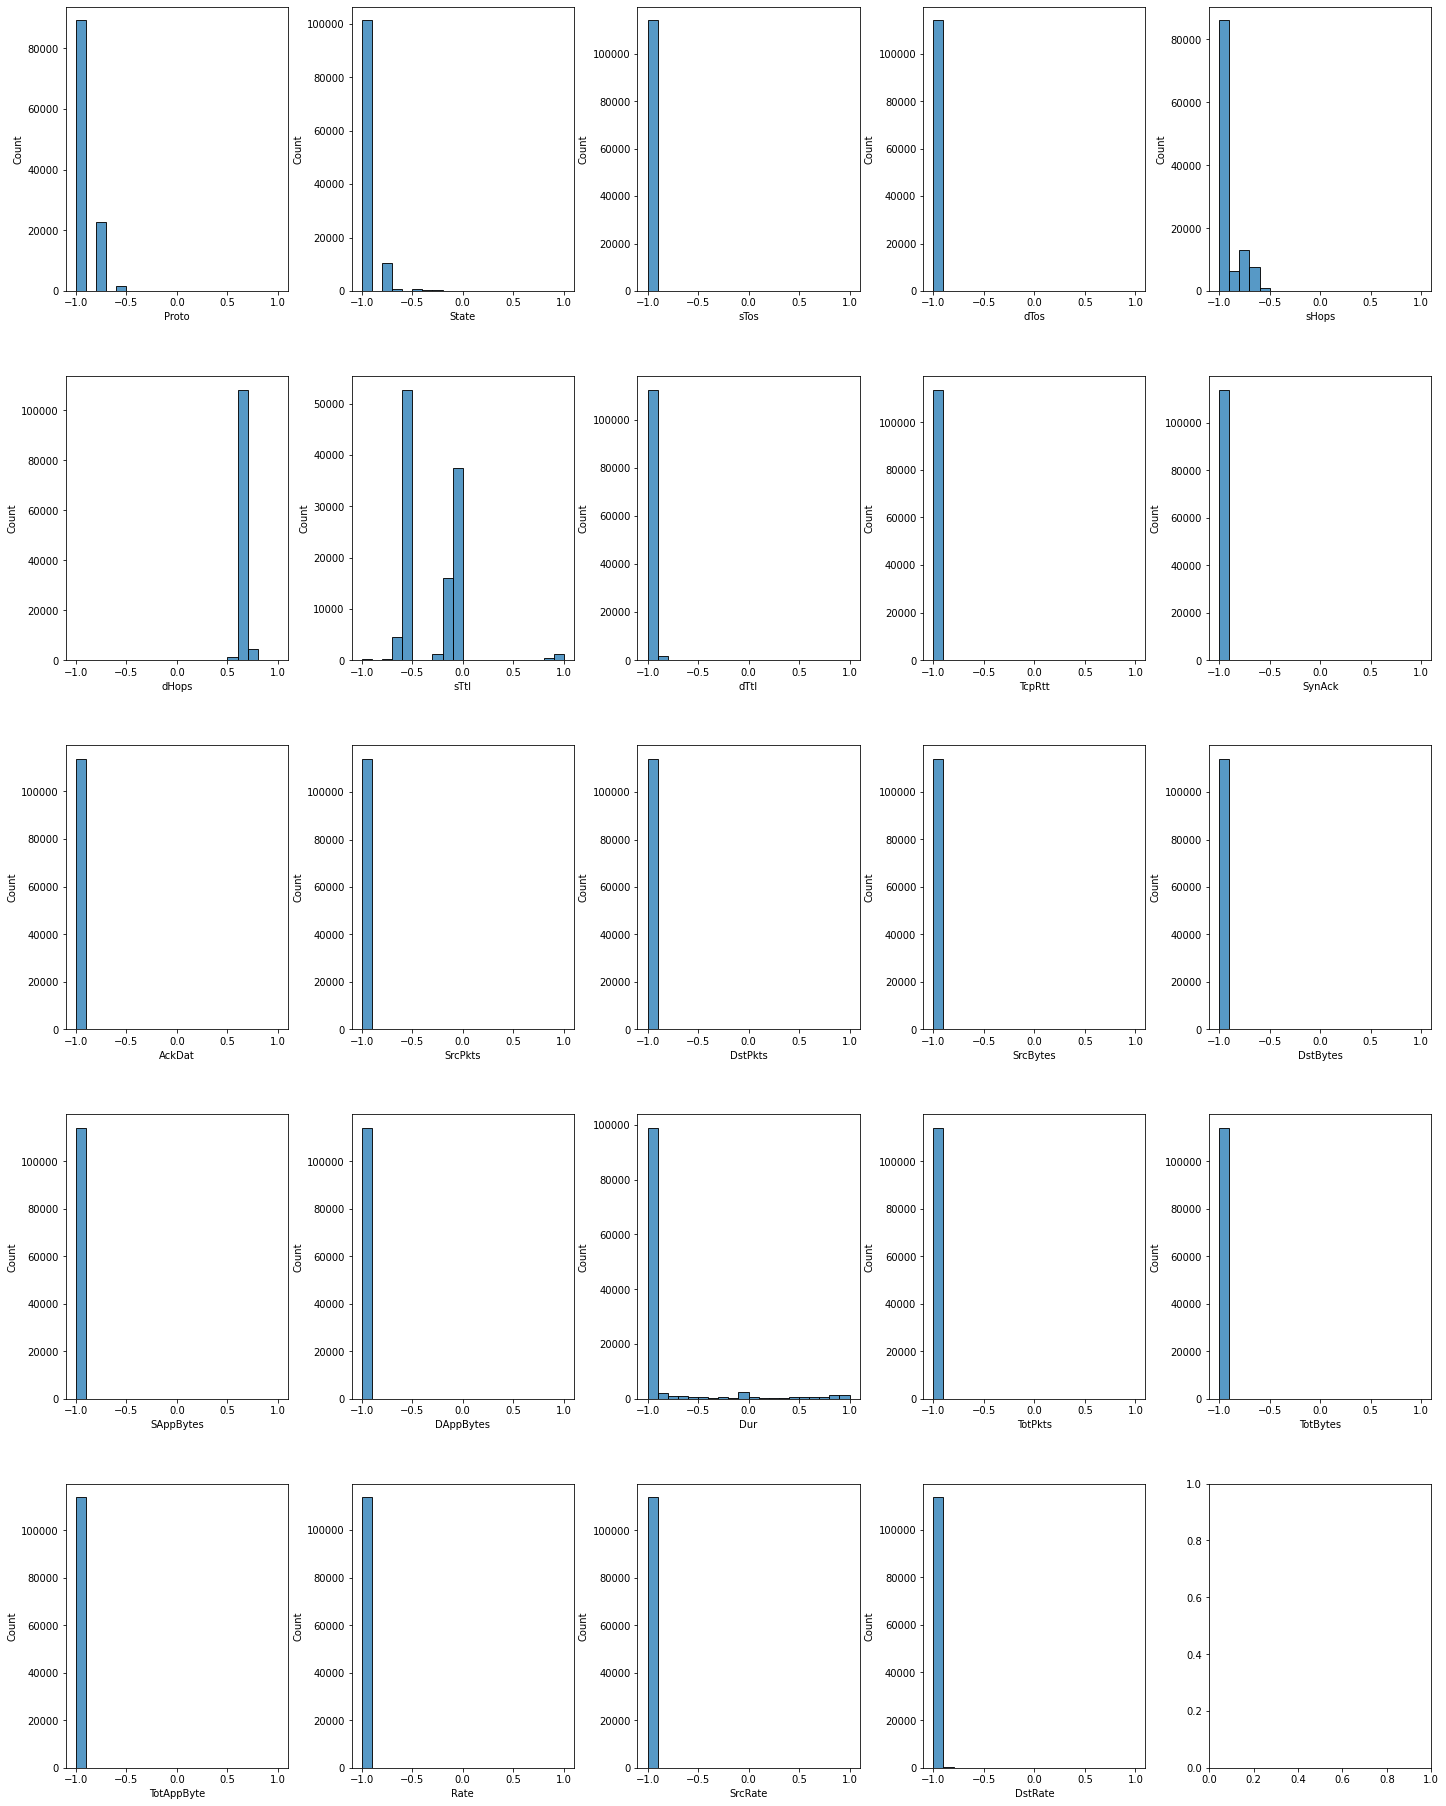

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20, 25))
axs = axs.flatten()

index = 0
for k,v in df_normalized.drop(['Label'], axis='columns').items(): 
    sns.histplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.2. Bivariate analysis


Ver mapa de calor de la correlación entre los valores de los atributos:

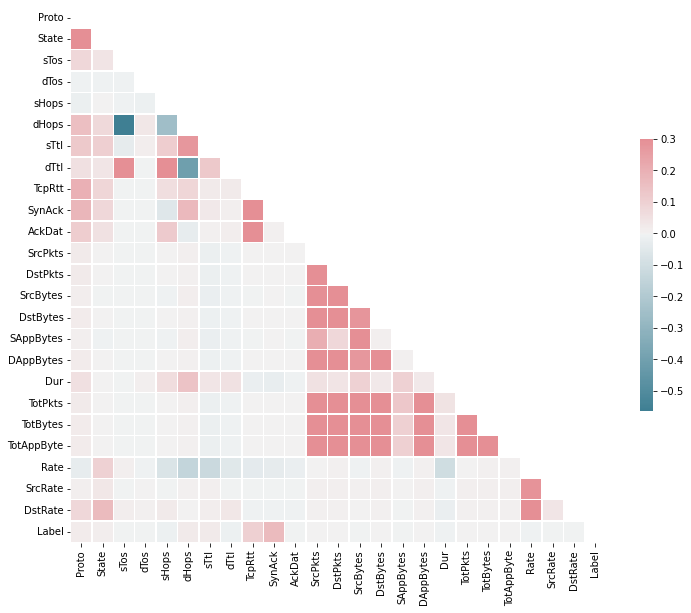

In [130]:
import numpy as np

corr = df_normalized.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

La correlación entre la variable de salida y el resto de atributos es muy baja.

Estudiar la regresión entre cada atributo y la variable de salida:

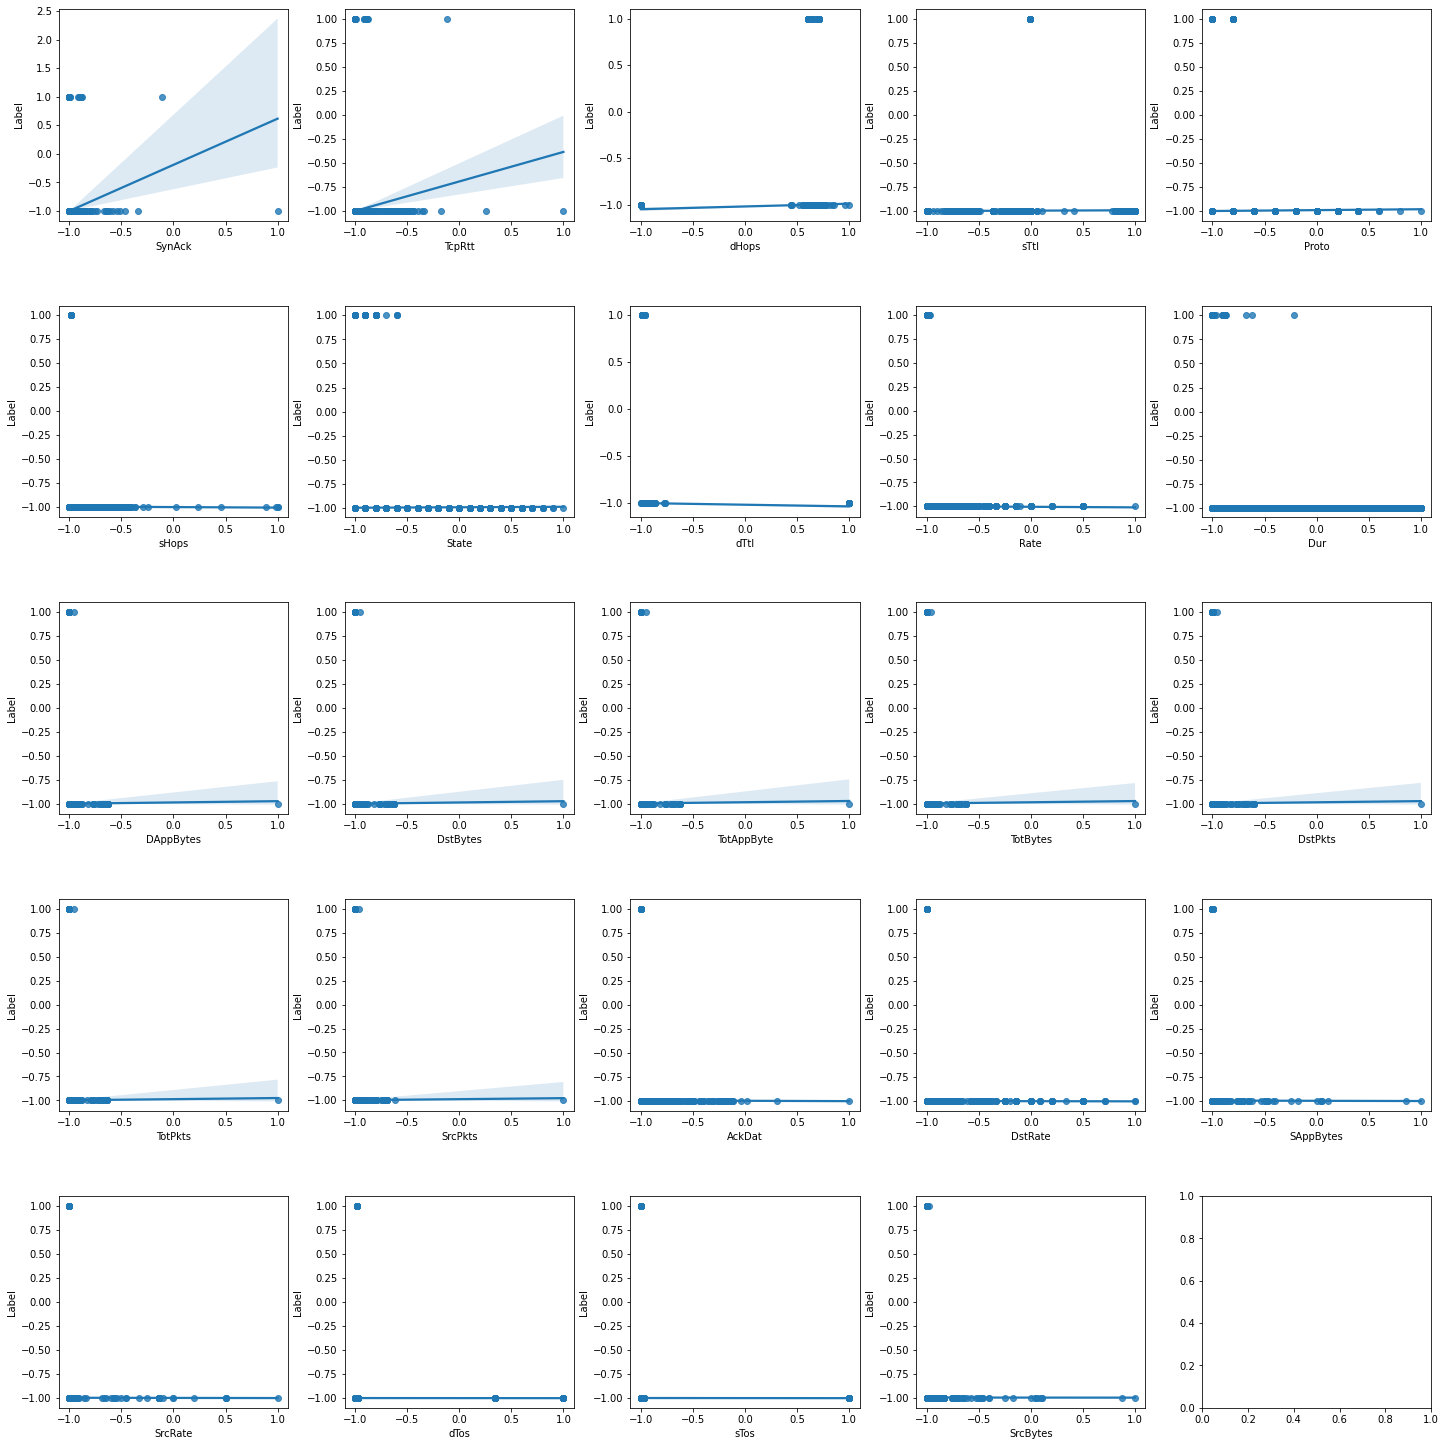

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

ordered_columns_corr = df_normalized.corr()['Label'].abs().sort_values(ascending=False).index

fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20, 20))
axs = axs.flatten()

index = 0
for colname in ordered_columns_corr:
    if colname != 'Label':
        sns.regplot(ax=axs[index], x=colname, y='Label', data=df_normalized)
        index += 1
        
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

No hay ningún atributo que tenga una alta correlación con la variable de salida.

## 3. Classification

Utilizar "*Cross-Validation*" para el *training* y el *testing* del *Dataset*.

In [132]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(columns=['Label'])
Y = df_normalized['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### 3.1. SVM

#### Linear kernel

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_linear = SVC(kernel='linear')

scores = cross_val_score(svm_linear, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9994630785429008


#### RBF kernel

In [138]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_rbf = SVC(kernel='rbf')

scores = cross_val_score(svm_rbf, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9994630785429008


#### Polynomial kernel

In [139]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_poly = SVC(kernel='poly', degree=3)

scores = cross_val_score(svm_poly, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9994411643369512


### 3.2. Decision tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clas = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(dt_clas, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9995836144794013


### 3.3. KNN

#### *k = 3*

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_3 = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn_clas_3, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9996164851880354


#### *k = 5*

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_5 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clas_5, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9996712725037813


#### *k = 11*

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clas_11 = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(knn_clas_11, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.9996603160010971


### 3.4. Naïve Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

naive_bayes = GaussianNB()
scores = cross_val_score(naive_bayes, X_train, Y_train, cv=10)
print('Cross-val score: ' + str(scores.mean()))

Cross-val score: 0.8504838113530834


## 4. Estimator evaluation

In [150]:
svm_fitted = svm_linear.fit(X_train, Y_train)
dt_clas_fitted = dt_clas.fit(X_train, Y_train)
knn_clas_fitted = knn_clas_11.fit(X_train, Y_train)
naive_bayes_fitted = naive_bayes.fit(X_train, Y_train)

### 4.1. Accuracy

In [151]:
print('SVM test score: ' + str(svm_fitted.score(X_test, Y_test)))
print('Decision tree test score: ' + str(dt_clas_fitted.score(X_test, Y_test)))
print('KNN test score: ' + str(knn_clas_fitted.score(X_test, Y_test)))
print('Naive Bayes test score: ' + str(naive_bayes_fitted.score(X_test, Y_test)))

SVM test score: 0.9993863955119214
Decision tree test score: 0.9996493688639552
KNN test score: 0.9996055399719496
Naive Bayes test score: 0.8446265778401122


### 4.2. Confusion matrix

#### SVM

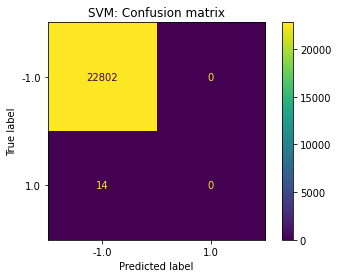

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_fitted, X_test, Y_test)
plt.title('SVM: Confusion matrix')
plt.show()

#### KNN

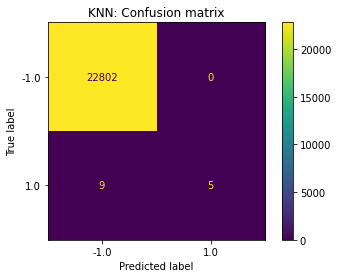

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_clas_fitted, X_test, Y_test) 
plt.title('KNN: Confusion matrix')
plt.show()

### 4.3. Precision and recall

Obtener predicciones:

In [148]:
knn_predictions = knn_clas_fitted.predict(X_test)
svm_predictions = svm_fitted.predict(X_test)

Evaluar predicciones:

In [149]:
from sklearn.metrics import classification_report

print('-1: Normal traffic')
print(' 1: Bot')

print('\nSVM evaluation')
print(classification_report(Y_test, svm_predictions, labels=[-1, 1], zero_division=0))

print('\nKNN evaluation')
print(classification_report(Y_test, knn_predictions, labels=[-1, 1], zero_division=0))

-1: Normal traffic
 1: Bot

SVM evaluation
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     22802
           1       0.00      0.00      0.00        14

    accuracy                           1.00     22816
   macro avg       0.50      0.50      0.50     22816
weighted avg       1.00      1.00      1.00     22816


KNN evaluation
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     22802
           1       1.00      0.36      0.53        14

    accuracy                           1.00     22816
   macro avg       1.00      0.68      0.76     22816
weighted avg       1.00      1.00      1.00     22816

